# Contagiousness Omicron Variant (B.1.1.529) of SARS-CoV-2

In [1]:
#import Pkg; Pkg.add("DataFrames"); Pkg.add("Plots");  Pkg.add("GLM");  Pkg.add("StatsBase"); Pkg.add("Gadfly"); Pkg.add("GR"); Pkg.add("ColorSchemes"); Pkg.add("LaTeXStrings"); Pkg.add("Latexify"); Pkg.add("Formatting"); Pkg.add("Optim"); Pkg.add("ForwardDiff")
using DataFrames, Plots, GLM, StatsBase, LinearAlgebra, Latexify, Formatting,  ColorSchemes, LaTeXStrings

## 🇩🇰 Data: Daily number of new cases, sequenced tests, and number of Omicron-variant cases
Cases is the daily number of new COVID-19 cases

$x$ is the number of sequenced positive tests identified as the Omicron variant.

$y$ is the number of sequenced positive tests identified as other variants

$n$ is the number of variant identified cases

In [2]:
# Vintage: Jan 14, 2022
Omicron   = DataFrame(
    Day     = ["Dec01","Dec02","Dec03","Dec04","Dec05","Dec06","Dec07","Dec08","Dec09","Dec10","Dec11","Dec12","Dec13","Dec14","Dec15","Dec16","Dec17","Dec18",
               "Dec19","Dec20","Dec21","Dec22","Dec23","Dec24","Dec25","Dec26","Dec27","Dec28","Dec29","Dec30","Dec31" ], 
    x       = [     77,     62,     75,    111,    167,  337,  515,  649,  707,  843, 1080, 1521, 2691,4044,4827,4438,5213,5163,4908,1611,2437,1035,2708, 494, 705,1986,4134,1324, 333, 829, 393 ],
    y       = [   4190,   4232,   4871,   4978,   4828, 6425, 6413, 5583, 5521, 5601, 5363, 5273, 6625,6412,5582,5037,4647,4070,3019, 954, 762, 288, 742, 103, 210, 311, 523, 147,  26,  81,  36 ]
)
Omicron.n = Omicron.x .+ Omicron.y
Omicron

,Day,x,y,n
,String,Int64,Int64,Int64
1,Dec01,77,4190,4267
2,Dec02,62,4232,4294
3,Dec03,75,4871,4946
4,Dec04,111,4978,5089
5,Dec05,167,4828,4995
6,Dec06,337,6425,6762
7,Dec07,515,6413,6928
8,Dec08,649,5583,6232
9,Dec09,707,5521,6228


## Compute Sequencing ratio, Omicron Prevalence, and standard errors
For a binomial distribution, the expected value is estimated by $$q = x/n$$ and the corresponding standard errors are $$\sigma = \sqrt{q(1-q)/n}.$$

In [3]:
# Proportion of sequenced tests that are Delta variant
q = Omicron.x ./ Omicron.n
Omicron.q = q
# standard errors for q = x/n
Omicron.σ = sqrt.(Omicron.q.*(1 .-Omicron.q) ./ Omicron.n) 
Omicron

,Day,x,y,n,q,σ
,String,Int64,Int64,Int64,Float64,Float64
1,Dec01,77,4190,4267,0.0180455,0.00203783
2,Dec02,62,4232,4294,0.0144388,0.00182044
3,Dec03,75,4871,4946,0.0151638,0.00173763
4,Dec04,111,4978,5089,0.0218118,0.00204758
5,Dec05,167,4828,4995,0.0334334,0.00254354
6,Dec06,337,6425,6762,0.0498373,0.0026463
7,Dec07,515,6413,6928,0.074336,0.00315154
8,Dec08,649,5583,6232,0.10414,0.00386914
9,Dec09,707,5521,6228,0.11352,0.00401972


## The Prevalence of Omicron Variant by week

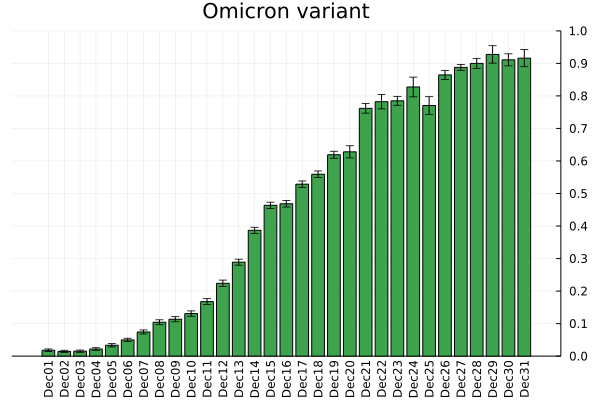

In [4]:
T = size(Omicron,1)
bar( Omicron.q, legend=false, xticks = (1:T, Omicron.Day),
    ylims=(0,1), yticks = 0.0:0.1:1.0, ymirror = true,
    title="Omicron variant", seriescolor=3,# size=(450,550),
    yerror=1.96.*Omicron.σ,xrotation = 90
)

# Basic Model for Analysis
Virus A (Receding variant).  New cases evolve according to $A_t = a_t A_{t-1}$

Virus B (Omicron variant). New cases evolve according to $B_t = b_t B_{t-1}$ 

The model will be based on the assumption that $$b_t = \gamma a_t,$$ where $\gamma$ measure the relative contagiouness of New relative to the Receding variant. 

$\gamma$ is the parameter of interest.

# Empirical Measurements on $\gamma$
Note that 
$$ \frac{B_t/B_{t-1}}{A_t/A_{t-1}} = \frac{\gamma a_t}{a_t}=\gamma. $$
We can rearrange the terms in the expression as follows,
$$ \gamma = \left. \frac{B_t}{A_t} \right/ \frac{B_{t-1}}{A_{t-1}}. $$ 
We do not observe the ratios, $\frac{B_t}{A_t}$ and $\frac{B_{t-1}}{A_{t-1}}$, but we can use the observed proportion of the new variant and scale the case numbers up. 

In [5]:
Omicron.Â = Omicron.n .* (1.0 .-Omicron.q)
Omicron.B̂ = Omicron.n .* Omicron.q
hcat(Omicron.Day,convert(Array{Int64},hcat(round.(Omicron.Â),round.(Omicron.B̂))));

This gives os a crude approximation to $\gamma$,
$$ \hat\gamma_t = \frac{\hat B_t/\hat B_{t-1}}{\hat A_t/\hat A_{t-1}}, $$ 
which we compute and plot below.

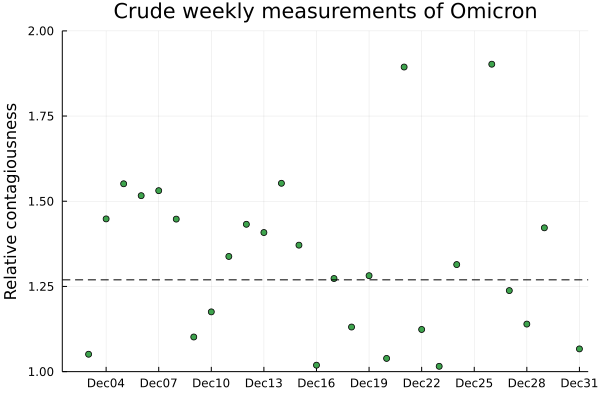

In [6]:
Omicron.odds = Omicron.q ./ (1.0 .- Omicron.q)
scatter(Omicron.Day[2:end], Omicron.odds[2:end]./Omicron.odds[1:end-1],legend=:none, ylim=(1,2),seriescolor=3,
    title="Crude weekly measurements of Omicron",ylabel ="Relative contagiousness")
plot!(x -> sum(Omicron.odds[2:end]./Omicron.odds[1:end-1])/(T-1),xlim=(0,T-1),linestyle = :dash, linecolor = :black, fmt=png)

It would be nice to add some standard errors... so let's do that... we can use...
$$ \hat\gamma_t = \frac{\hat B_t/\hat B_{t-1}}{\hat A_t/\hat A_{t-1}}  = \left.  \frac{x_t}{n_t-x_t} \right/ \frac{x_{t-1}}{n_{t-1}-x_{t-1}}, $$ 
ratio of two binomial... crunch crunch.. delta-method... crunch crunch...

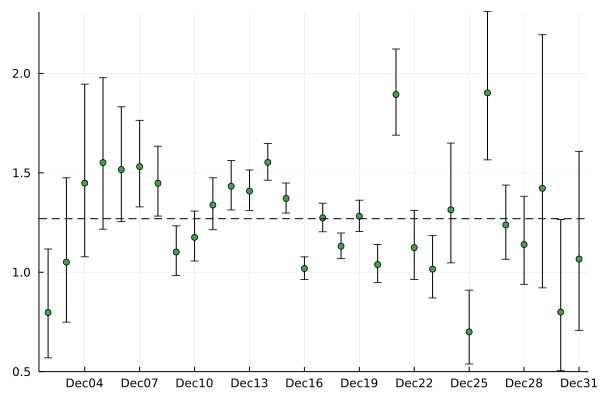

In [7]:
VarLogOdds    = 1.0 ./ ( Omicron.n .* Omicron.q .* (1 .- Omicron.q))
StdErrRelLogOdds = sqrt.(VarLogOdds[2:end] .+ VarLogOdds[1:end-1])
OddsRatio = Omicron.odds[2:end]./Omicron.odds[1:end-1]


plot1 = (
scatter(Omicron.Day[2:end], OddsRatio,legend=:none, 
    ylim=(0.50,2.31),xrotation = 0,  
    seriescolor=3, 
    #ymirror = true, 
    size=(600,400),fmt = png,
    yerror=(OddsRatio .- exp.(log.(OddsRatio) .- 1.96.*StdErrRelLogOdds) ,exp.(log.(OddsRatio) .+ 1.96.*StdErrRelLogOdds) .- OddsRatio),
    #title="Crude daily measures", titlefontsize = 12#,
    #ylabel = "Relative contagiousness of Omicron"
  ) )
N = size(OddsRatio,1)
aveCrude = sum(OddsRatio)/N
plot!( x -> aveCrude,xlim=(0,T-1),linestyle = :dash, linecolor = :black)#, size=(550,550))
    
plot1

These are noisy measurements that fluctuate quite a bit. Average is: 

In [8]:
print("Crude estimate of γ is ", round(aveCrude,digits=2))

Crude estimate of γ is 1.27

Which happens to be close to the maximum likelhood estimate we obtain below: $\hat\gamma\approx1.28$.

## Trend variable for glm estimation

In [9]:
#Add column with time trend for glm estimation
    Omicron.time_trend = convert(Array{Float64},collect(1:size(Omicron,1)))
# variable below might be useful for modeling weekly periodicity
# Omicron.period = sin.( (2*π/7).* convert(Array{Float64},collect(1:size(Omicron,1))))

31-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
  ⋮
 20.0
 21.0
 22.0
 23.0
 24.0
 25.0
 26.0
 27.0
 28.0
 29.0
 30.0
 31.0

## The ratio of Omicron variant cases to all cases
We can introduce the ratio of Omicron cases to all cases,
$$\lambda_t = \frac{B_t}{A_t+B_t}.$$
From the dynamics for $A_t$ and $B_t$ it follows that the Omicron-ratio, progresses in the following manner:
$$\lambda_{t+1}= \frac{\gamma\lambda_t}{\gamma\lambda_t+(1-\lambda_t)}.$$

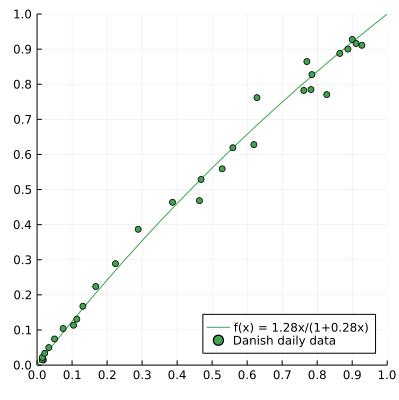

In [10]:
g = 1.28

plot2 = (
plot(x->g*x/(1+(g-1)*x),
    xlim=(0,1), xticks = 0.0:0.1:1.0,
    ylim=(0,1), yticks = 0.0:0.1:1.0,
    legend=:bottomright, label="f(x) = $(g)x/(1+$(round(g-1,digits=2))x)", 
    fmt   = png, size=(400,400), seriescolor = 3#,    title = "Daily Progression (Omicron)"
    )
    )
#g = 2
#plot!(x->g*x/(1+(g-1)*x),xlim=(0,1),ylim=(0,1),legend=:bottomright, 
#    label="f(x) = $(g)x/(1+$(round(g-1,digits=2))x)", 
#    seriescolor = 2, 
#    linestyle = :dot
#)
#g = 5
#plot!(x->g*x/(1+(g-1)*x),xlim=(0,1),ylim=(0,1),legend=:bottomright, 
#    label="f(x) = $(g)x/(1+$(round(g-1,digits=2))x)",
#    seriescolor = 2, 
#    linestyle = :dash 
#)
scatter!(Omicron.q[1:end-1],Omicron.q[2:end],aspect_ratio = 1,
    label = "Danish daily data",
    seriescolor = 3
)
plot2

## Maximum Likelihood Estimation with Logistic Regression
A better approach to estimating $\gamma$ that makes far better use of the information in the data is maximum likelihood estimation. Assuming that the sequenced positive tests constitute a representative random sample, we know that $x_t$ is binomally distributed $\mathrm{bin}(n_t,\lambda_t)$. 

Likelihood function for observations in week $t$, 
$$ L(\lambda_t) = \binom{N_t}{X_t} \lambda_t^{X_t}(1-\lambda_t)^{N_t-X_t}.$$
The log-likelihood function for all weekly observation is therefore proportional to:
$$ \ell(\lambda_0,\gamma) \propto \sum_{t=1}^T {X_t} \log\lambda_t +({N_t-X_t})\log(1-\lambda_t),$$ where
$\lambda_t=\gamma\lambda_{t-1}/[\gamma\lambda_{t-1}+(1-\lambda_{t-1}]$. The two unknown parameters (to be estimated from data) is the initial value, $\lambda_0$, and our parameter of interest, $\gamma$.

The maximum likelihood estimates of these parameters are simply given by $$(\hat\lambda_0,\hat\gamma) =\arg \max_{\lambda_0,\gamma}\ell(\lambda_0,\gamma),$$
and maximum likelihood gives us ways to test hypothesis and construct confidence intervals for the unknown parameters.

In [11]:
function logL(θ,n,x,output)  
    α = θ[1]
    β = θ[2]
    λ = [1/(1+exp(- α - t*β)) for t in 1:size(n,1)]
    ℓ = x.*log.(λ) .+ (n.-x) .* log.(1.0 .-λ)
    if output=="Total"       # Evaluate log-Likelihood (for maximization)
        sum(ℓ)
    elseif output=="Vector"  # Use for computing scores (Jacobian)
        ℓ
    end
end   
θ = [-10,0.6]
using   Optim, ForwardDiff
obj = θ -> -logL(θ,Omicron.n,Omicron.x,"Total")
    res = optimize(obj, θ, autodiff=:forward,iterations =10000,show_trace=false)
    θ .= Optim.minimizer(res)
    ρ̂₀ = exp(θ[1])
    γ̂  = exp(θ[2])
print("The maximum likelihood estimates are ρ̂₀ = $(round(ρ̂₀,digits=4)) and γ̂  = $(round(γ̂,digits=3)).")

The maximum likelihood estimates are ρ̂₀ = 0.0164 and γ̂  = 1.276.

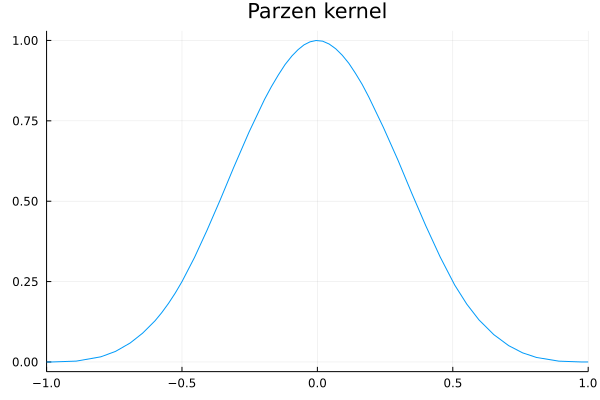

In [12]:
function Parzen(k,K)      # Parzen kernel weights
    x = abs(k/K)
    x==0 ? 1 : x>1 ? 0 : x<0.5 ? 1-6*x^2+6*x^3 : 2*(1-x)^3
end
function VCOV(θ,n,x,K=0)    # computes HAC robust variance covariance matrix
    T     = size(n,1) 
    S  = zeros(T,2)
    λ = [1/(1+exp(-θ[1] - t*θ[2])) for t in 1:T]
    S[:,1] = n.*λ .- x
    S[:,2] = S[:,1] .* [t for t in 1:T]
    h = n.*λ.*(1.0 .- λ)
    A = zeros(2,2)
    for t in 1:T
        A += h[t]*[1, t]*[1 t]
    end
    B = S'S
    for j=1:K
        B +=  Parzen(j,K+1)*(S[j+1:end,:]'S[1:end-j,:]+S[1:end-j,:]'S[j+1:end,:])
    end
    A^(-1)*B*A^(-1)
end  
plot(x->Parzen(convert(Int64,round(x*1000,digits=0)),1000),xlims=(-1,1),title="Parzen kernel",legend=:none)

In [13]:
V̂  = VCOV(θ,Omicron.n,Omicron.x,4) 
σ₁ = √V̂[1,1]
σ₂ = √V̂[2,2]

print( "ROBUST STANDARD ERRORS: \n ",
    "α          = ", round(θ[1], digits=2)," [CI 95%: ", 
    round.(θ[1] -1.96*σ₁ , digits=2),",",
    round.(θ[1] +1.96*σ₁ , digits=2),"]       \n ",
    "β = log(γ) = ", round(θ[2], digits=3)," [CI 95%: ", 
    round.(θ[2] -1.96*σ₂ , digits=3),",",
    round.(θ[2] +1.96*σ₂ , digits=3),"]       \n ",
    
    "γ̂day       = ", round(exp(θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.((θ[2] -1.96*σ₂)) , digits=2),",",
    round.(exp.((θ[2] +1.96*σ₂)) , digits=2),"]       \n ",
    
    "γ̂gen       = ", round(exp(4.7*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(4.7*(θ[2] -1.96*σ₂)) , digits=2),",",
    round.(exp.(4.7*(θ[2] +1.96*σ₂)) , digits=2),"]        \n ",
    
    "γ̂week      = ", round(exp(7*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(7*(θ[2] -1.96*σ₂)) , digits=2),",",
    round.(exp.(7*(θ[2] +1.96*σ₂)) , digits=2),"]       ")

ROBUST STANDARD ERRORS: 
 α          = -4.11 [CI 95%: -4.49,-3.74]       
 β = log(γ) = 0.244 [CI 95%: 0.221,0.267]       
 γ̂day       = 1.28 [CI 95%: 1.25,1.31]       
 γ̂gen       = 3.15 [CI 95%: 2.83,3.5]        
 γ̂week      = 5.52 [CI 95%: 4.7,6.47]       

In [14]:
Del_σ₂ = σ₂
print("For later use: Del_σ₂ = $Del_σ₂ ")

For later use: Del_σ₂ = 0.011649240839862279 

In [15]:
gen = 7
# AVAR GLM (non-robust)
    Omicron.time_trend = convert(Array{Float64},collect(1:size(Omicron,1)))
    glmDelta = fit(GeneralizedLinearModel, @formula(x / n ~ time_trend), Omicron, wts = Omicron.n, Binomial())
    Omicron.time_trend = convert(Array{Float64},collect(1:size(Omicron,1)))
V̂ₙ = vcov(glmDelta)
σ₂ = √V̂ₙ[2,2]

print( "ROBUST STANDARD ERRORS: \n ",
    "γ̂gen       = ", round(exp(gen*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(gen*(θ[2] -1.96*σ₂)) , digits=4),",",
    round.(exp.(gen*(θ[2] +1.96*σ₂)) , digits=4),"]   \n ")
for k = 0:6
    V̂  = VCOV(θ,Omicron.n,Omicron.x,k) 
    σ₂ = √V̂[2,2]
    print( "ROBUST STANDARD ERRORS K = $k: \n ",
    "γ̂gen       = ", round(exp(gen*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(gen*(θ[2] -1.96*σ₂)) , digits=4),",",
    round.(exp.(gen*(θ[2] +1.96*σ₂)) , digits=4),"]       \n ")
end

ROBUST STANDARD ERRORS: 
 γ̂gen       = 5.52 [CI 95%: 5.4155,5.6204]   
 ROBUST STANDARD ERRORS K = 0: 
 γ̂gen       = 5.52 [CI 95%: 4.9966,6.0917]       
 ROBUST STANDARD ERRORS K = 1: 
 γ̂gen       = 5.52 [CI 95%: 4.9207,6.1857]       
 ROBUST STANDARD ERRORS K = 2: 
 γ̂gen       = 5.52 [CI 95%: 4.8281,6.3042]       
 ROBUST STANDARD ERRORS K = 3: 
 γ̂gen       = 5.52 [CI 95%: 4.7589,6.3959]       
 ROBUST STANDARD ERRORS K = 4: 
 γ̂gen       = 5.52 [CI 95%: 4.7021,6.4732]       
 ROBUST STANDARD ERRORS K = 5: 
 γ̂gen       = 5.52 [CI 95%: 4.6544,6.5396]       
 ROBUST STANDARD ERRORS K = 6: 
 γ̂gen       = 5.52 [CI 95%: 4.6129,6.5984]       
 

# When will/did Omega become dominant variant?
We solve $$ \frac{1}{2} = \frac{1}{1+\exp(-\hat\alpha - \hat\beta\times \tau^\ast)}.$$
Rearrange  to get $ \exp (-\hat\alpha - \hat\beta\times \tau^\ast) = 1$, then take (natural) logarithm, to get 
$$ \tau^\ast = -\frac{\hat\alpha}{\hat\beta}.$$

In [16]:
α̂ = θ[1]
β̂ = θ[2]
τₕ = -α̂/β̂
print("τₕ = ", round(-α̂/β̂,digits = 3))

τₕ = 16.858

So on December 16th (give or take)

## Proportion of Delta Variant Implied by Estimated Model

In [17]:
Omicron.lam = 1.0 ./ (1.0 .+ exp.(-θ[1] .- (Omicron.time_trend).*θ[2]))

31-element Vector{Float64}:
 0.020453170705824027
 0.025957987283336603
 0.03289463006843746
 0.041605744700179095
 0.0524984994715763
 0.06604654488510713
 0.08278539364751711
 0.10329733189684182
 0.1281813093861537
 0.15800349789955892
 0.19322622627230723
 0.2341176876996968
 0.2806524515310322
 ⋮
 0.6827875027427094
 0.733135372126313
 0.7780892391355309
 0.8173570613083169
 0.8510068689523516
 0.8793720485803198
 0.9029529112562362
 0.9223312283994379
 0.9381053314903703
 0.9508465305735708
 0.9610737488816102
 0.9692418550552376

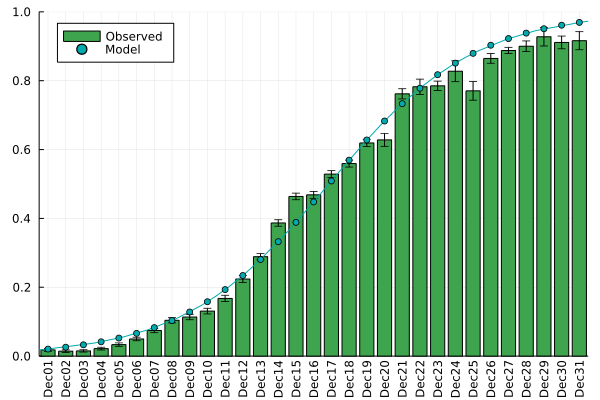

In [18]:
plot3 = bar( Omicron.q, legend = :topleft, label= "Observed", xticks = (1:1:T, Omicron.Day[1:1:T]), xtickfontsize=8,
    titlefontsize = 12, ylims = (0,1),seriescolor=3, xrotation = 90,
     # title="Proportion of Omicron",
    yerror=1.96.*Omicron.σ
)     
plot!(t -> 1/(1+exp(-log(ρ̂₀) - (t)*log(γ̂))),label = :none, xlims = (0.5,T+0.5),seriescolor=6) 
scatter!(Omicron.time_trend, Omicron.lam ,label = "Model", xlims = (0.5,T+0.5), seriescolor=6, size=(600,400), fmt = png)
plot3 

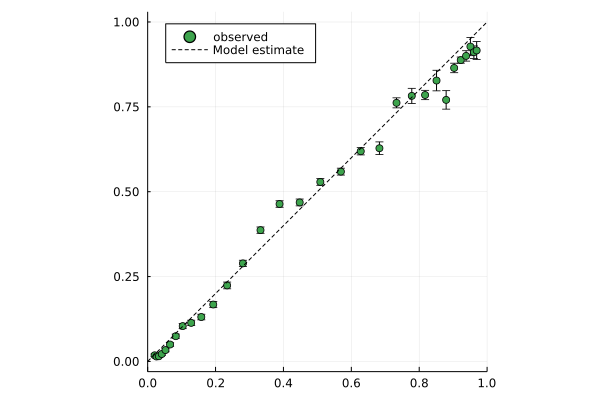

In [19]:
scatter(Omicron.lam,Omicron.q,label="observed",legend=:topleft, xlims=(0,1),#ylims=(0,0.22),
    aspect_ratio = 1, seriescolor=3,
 yerror=1.96.*Omicron.σ)
plot!(x->x,label="Model estimate",linestyle=:dash,linecolor=:black)

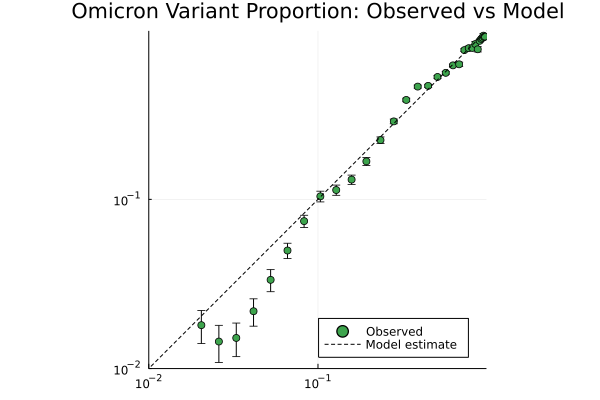

In [20]:
scatter(Omicron.lam,Omicron.q,label="Observed",legend=:bottomright, xlims=(0.01,0.99),ylims=(0.01,0.99),scale=:log10,
    aspect_ratio = 1, title = "Omicron Variant Proportion: Observed vs Model", seriescolor=3,
 yerror=1.96.*Omicron.σ)
plot!([0.0002:0.15:100],[0.0002:0.15:100],label="Model estimate",linestyle=:dash,linecolor=:black)

## Progression of the Odds Ratio

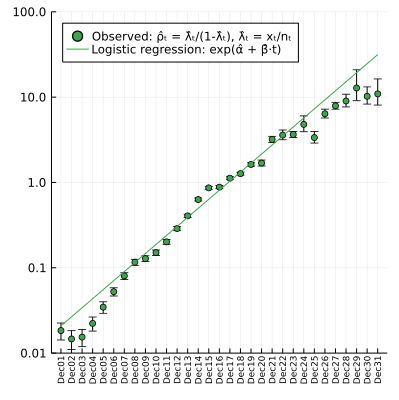

In [21]:
ql = q .- 1.96.*Omicron.σ
qu = q .+ 1.96.*Omicron.σ
ρ  = q  ./ (1 .- q)
ρl = ql ./ (1 .- ql) 
ρu = qu ./ (1 .- qu) 
scatter(Omicron.time_trend,ρ, yaxis =:log, label = "Observed: ρ̂ₜ = λ̂ₜ/(1-λ̂ₜ), λ̂ₜ = xₜ/nₜ",legend = :topleft,
       # title = "Log Odds Ratios (Omicron)",
        titlefontsize = 12, xtickfontsize=6,
        yticks = ([0.01,0.1,1,10,100]),
        xticks = (Omicron.time_trend, Omicron.Day),
        yformatter = y -> Float64(y), fmt=png,
        ylims=(0.01,100),  seriescolor=3,  xrotation = 90,
        yerror=(ρ-ρl,ρu-ρ)
    )
plot!(Omicron.time_trend[1:end],t->exp(α̂+β̂*t), label = "Logistic regression: exp(α̂ + β̂⋅t)",seriescolor = 3, size=(400,400))
